In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
LOCAL_PATH = 'Speech recognition project/Code/Data/'
PATH_SAB = '/content/gdrive/My Drive/KTH 4/P4/Speech Recognition/' + LOCAL_PATH
PATH_TIM = '/content/gdrive/My Drive/' + LOCAL_PATH
PATH_LOR = '/content/gdrive/My Drive/' + LOCAL_PATH
PATH_SEB = '/content/gdrive/My Drive/' + LOCAL_PATH

In [ ]:
CURRENT_PATH = PATH_SAB

In [ ]:
%%bash
pip install numpy scipy librosa unidecode inflect librosa

Downloading: "https://github.com/nvidia/DeepLearningExamples/archive/torchhub.zip" to /root/.cache/torch/hub/torchhub.zip


(array([0.00094815, 0.00126421, 0.00316051, 0.00458274, 0.018331  ,
        0.04029651, 0.0241779 , 0.0518325 , 0.05214842, 0.08090906,
        0.11093405, 0.12120572, 0.15691934, 0.18141351, 0.19373952,
        0.20669738, 0.19848029, 0.20416922, 0.19089482, 0.17319618,
        0.14791197, 0.11314634, 0.08564993, 0.07111153, 0.04314099,
        0.03492367, 0.02907672, 0.01501243, 0.00869141, 0.00237038]),
 array([-1.1297178e+01, -1.0907517e+01, -1.0517858e+01, -1.0128197e+01,
        -9.7385359e+00, -9.3488760e+00, -8.9592152e+00, -8.5695543e+00,
        -8.1798944e+00, -7.7902336e+00, -7.4005728e+00, -7.0109124e+00,
        -6.6212521e+00, -6.2315912e+00, -5.8419309e+00, -5.4522705e+00,
        -5.0626097e+00, -4.6729493e+00, -4.2832890e+00, -3.8936281e+00,
        -3.5039678e+00, -3.1143072e+00, -2.7246466e+00, -2.3349862e+00,
        -1.9453256e+00, -1.5556650e+00, -1.1660045e+00, -7.7634400e-01,
        -3.8668343e-01,  2.9770811e-03,  3.9263761e-01], dtype=float32),
 <a list of 3

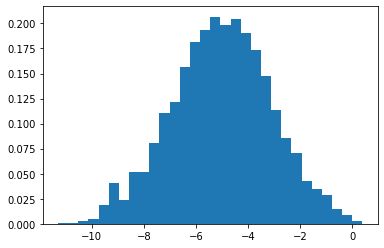

In [ ]:
# Range test
import torch
import numpy as np
import matplotlib.pyplot as plt

tacotron2 = torch.hub.load('nvidia/DeepLearningExamples:torchhub', 'nvidia_tacotron2')
tacotron2 = tacotron2.to('cuda')
tacotron2.eval()

text = "I am currently testing, this is wierd"

sequence = np.array(tacotron2.text_to_sequence(text, ['english_cleaners']))[None, :]
sequence = torch.from_numpy(sequence).to(device='cuda', dtype=torch.int64)
_, mel, _, _ = tacotron2.infer(sequence)

mel = mel.data.cpu().numpy()[0]

x = []
for i in range(np.size(mel, 0)):
  for j in range(np.size(mel, 1)):
    x.append(mel[i][j])

#print(np.min(mel))
#print(np.max(mel))

plt.hist(x, density=True, bins=30)

# Results
# Range: -11 to 1
# Distribution: Normal(Gaussian)

In [ ]:
#Extract filenames
import os
import numpy as np

def find_filenames(path):
    filenames = []
    for idx,filename in enumerate(os.listdir(path)):
      filenames.append(filename)
    return sorted(filenames)

file_names = find_filenames(CURRENT_PATH + 'LJSpeech-1.1/wavs')

#with open(CURRENT_PATH + 'file_names.npy', 'wb') as f:
    #np.save(f, file_names)

In [ ]:
with open(CURRENT_PATH + 'file_names.npy', 'rb') as f:
      file_names = np.load(f,allow_pickle=True)
print(len(file_names))

13100


In [ ]:
#Extract transcriptions
import pandas as pd

def find_transcriptions(path):
    file = open(path)
    data = {}
    for line in file:
      line = line.split('|')
      data[f'{line[0]}.wav'] = line[1]
    
    return data

file2text = find_transcriptions(CURRENT_PATH + 'LJSpeech-1.1/metadata.csv')

wav_text = [file2text[x] for x in file_names]

print(len(wav_text))



13100


In [27]:
import torch
import numpy as np
import matplotlib.pyplot as plt

tacotron2 = torch.hub.load('nvidia/DeepLearningExamples:torchhub', 'nvidia_tacotron2')
tacotron2 = tacotron2.to('cuda')
tacotron2.eval()


def text2mel(texts):
  mel_spectograms = []
  for idx,text in enumerate(texts):
    sequence = np.array(tacotron2.text_to_sequence(text, ['english_cleaners']))[None, :]
    sequence = torch.from_numpy(sequence).to(device='cuda', dtype=torch.int64)
    _, mel, _, _ = tacotron2.infer(sequence)
    mel = mel.data.cpu().numpy()[0]
    mel_spectograms.append(mel)
    with open(CURRENT_PATH + '/mel_spectrograms/mel_spectrograms_' + str(idx) + '.npy', 'wb') as f:
      np.save(f, mel)
  return mel_spectograms

mel_spectrograms = text2mel(wav_text)

print(len(mel_spectrograms))



Using cache found in /root/.cache/torch/hub/nvidia_DeepLearningExamples_torchhub
Exception ignored in: <function ZipFile.__del__ at 0x7f12168e9b90>
Traceback (most recent call last):
  File "/usr/lib/python3.7/zipfile.py", line 1809, in __del__
    self.close()
  File "/usr/lib/python3.7/zipfile.py", line 1826, in close
    self.fp.seek(self.start_dir)
ValueError: seek of closed file


Warning! Reached max decoder steps
Warning! Reached max decoder steps
13100


In [19]:
import numpy as np

with open(CURRENT_PATH + 'mel_spectrograms.npy', 'rb') as f:
    mel_spectrograms = np.load(f, allow_pickle=True)
print(len(mel_spectrograms))

SyntaxError: ignored

In [ ]:
#with open(CURRENT_PATH + 'mel_spectrograms.npy', 'rb') as f:
    #mel_spectrograms = np.load(f)

mel_lens = []
flattened_mels = []

for mel in mel_spectrograms:
  print(mel.shape)
  mel = mel.flatten()
  print(len(mel))
  mel_lens.append(len(mel))
  flattened_mels.append(mel)

#with open(CURRENT_PATH + 'flattened_mels.npy', 'wb') as f:
      #np.save(f, flattened_mels)

max_mel_len = max(mel_lens)

#with open(CURRENT_PATH + 'max_mel_len.npy', 'wb') as f:
      #np.save(f, np.asarray([max_mel_len]))

flattened_padded_mels = []

for mel in flattened_mels:
  mel = np.resize(mel,max_mel_len)#zero-pads each flattened mel
  print(len(mel))
  #mel = np.char.rjust(mel,width=max_mel_len, fillchar='*')
  flattened_padded_mels.append(mel)

#with open(CURRENT_PATH + 'flattened_padded_mels.npy', 'wb') as f:
      #np.save(f, flattened_padded_mels)



(80, 215)
17200
17200


In [ ]:
#make ground truth mel spectrograms from waveforms

#importera wav filer
#gör om till mel spectrograms

#https://stackoverflow.com/questions/44787437/how-to-convert-a-wav-file-to-a-spectrogram-in-python3
import librosa
def wav2mel(wav_file_names):
  wav_mel_spectograms = []
  for file_name in wav_file_names:
    y, sr = librosa.load(CURRENT_PATH + 'LJSpeech-1.1/wavs/' + file_name, sr=None)
    mel = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=1024, hop_length=256)
    wav_mel_spectograms.append(mel)
  return wav_mel_spectograms

wav_mel_spectrograms = wav2mel(file_names)

#with open(CURRENT_PATH + 'wav_mel_spectrograms.npy', 'wb') as f:
      #np.save(f, wav_mel_spectrograms)

In [ ]:
#gör wav filer till arrayer
from scipy.io import wavfile

#with open(CURRENT_PATH + 'file_names.npy', 'rb') as f:
    #file_names = np.load(f)

def wav_to_array(wav_file_names):
  wav_arrays = []
  for file_name in wav_file_names:
    samplerate, data = wavfile.read(CURRENT_PATH + 'LJSpeech-1.1/wavs/' + file_name)
    new_data = data[::10] #take every tenth amp sample
    wav_arrays.append(new_data)
  return wav_arrays

wav_arrays = wav_to_array(file_names)

#with open(CURRENT_PATH + 'wav_arrays.npy', 'wb') as f:
      #np.save(f, wav_arrays)



In [ ]:
padded_wav_arrays = []

wav_lens = []

for wav in wav_arrays:
  wav_lens.append(len(wav))

max_wav_len = max(wav_lens)

for wav in wav_arrays:
  wav = np.resize(wav,max_wav_len)#zero-pads each flattened mel
  padded_wav_arrays.append(wav)

#with open(CURRENT_PATH + 'padded_wav_arrays.npy', 'wb') as f:
      #np.save(f, padded_wav_arrays)

In [ ]:
print(np.array(padded_wav_arrays).shape)

(2, 12944)


In [ ]:
#with open(CURRENT_PATH + 'wav_mel_spectrograms.npy', 'rb') as f:
    #wav_mel_spectrograms = np.load(f)


wav_mel_lens = []
flattened_wav_mels = []

for mel in wav_mel_spectrograms:
  mel = mel.flatten()
  wav_mel_lens.append(len(mel))
  flattened_wav_mels.append(mel)

#with open(CURRENT_PATH + 'flattened_wav_mels.npy', 'wb') as f:
      #np.save(f, flattened_wav_mels)

max_wav_mel_len = max(wav_mel_lens)

#with open(CURRENT_PATH + 'max_wav_mel_len.npy', 'wb') as f:
      #np.save(f, np.asarray([max_wav_mel_len]))

flattened_padded_wav_mels = []

for mel in flattened_wav_mels:
  mel = np.resize(mel,max_wav_mel_len)#zero-pads each flattened mel
  #mel = np.char.rjust(mel,width=max_wav_mel_len, fillchar='*')
  flattened_padded_wav_mels.append(mel)

#with open(CURRENT_PATH + 'flattened_padded_wav_mels.npy', 'wb') as f:
      #np.save(f, flattened_padded_wav_mels)

In [ ]:
#train 

import math
import numpy as np
import torch
import torch.nn as nn


with open(CURRENT_PATH + 'max_mel_len.npy', 'rb') as f:
    max_mel_len = np.load(f)

max_mel_len = max_mel_len[0]




with open(CURRENT_PATH + 'flattened_padded_mels.npy', 'rb') as f:
      flattened_padded_mels = np.load(f,allow_pickle=True)





print(flattened_padded_mels.shape)

print(padded_wav_arrays.shape)

(13100, 80000)


NameError: ignored

In [ ]:
with open(CURRENT_PATH + 'flattened_mels.npy', 'rb') as f:
      flattened_mels = np.load(f,allow_pickle=True)
      
with open(CURRENT_PATH + 'padded_wav_arrays.npy', 'rb') as f:
      padded_wav_arrays = np.load(f,allow_pickle=True)

print(padded_wav_arrays.shape)

(13100, 22263)


In [ ]:
print(flattened_mels.shape)

mel_spectrograms = np.array([np.reshape(x, (int(x.shape[0]/80), 80)) for x in flattened_mels])

(13100,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  after removing the cwd from sys.path.


In [ ]:
saved_idx = []
cutoff = 30000
mel_lens = []
for idx,mel in enumerate(flattened_mels):
  if len(mel) <= cutoff:
    saved_idx.append(idx)
    mel_lens.append(len(mel))

max_mel_len = max(mel_lens)
flattened_mels = flattened_mels[saved_idx]
padded_wav_arrays = padded_wav_arrays[saved_idx]

flattened_padded_mels = []

for mel in flattened_mels:
  mel = np.resize(mel,max_mel_len)#zero-pads each flattened mel
  flattened_padded_mels.append(mel)


In [ ]:
#GAN = generator + discriminator

import torch
import torch.nn as nn

class Generator(nn.Module):

    def __init__(self, input_length: int, output_length : int):
        super(Generator, self).__init__()
        self.dense_layer = nn.Linear(int(input_length), int(output_length))
        self.activation = nn.Sigmoid()

    def forward(self, x):
        return self.activation(self.dense_layer(x))

class Discriminator(nn.Module):
    def __init__(self, input_length: int):
        super(Discriminator, self).__init__()
        self.dense = nn.Linear(int(input_length), 1);
        self.activation = nn.Sigmoid()

    def forward(self, x):
        return self.activation(self.dense(x))



In [ ]:
#GAN = generator + discriminator

import torch
import torch.nn as nn

class Generator(nn.Module):

    def __init__(self, input_length: int, output_length : int):
        super(Generator, self).__init__()
        self.conv_layer1 = nn.Conv2d(in_channels=1,out_channels=768,kernel_size = 3)
        self.conv_layer2 = nn.Conv2d(in_channels=768,out_channels=384,kernel_size = 3)
        self.conv_layer3 = nn.Conv2d(in_channels=384,out_channels=192,kernel_size = 3)
        self.conv_layer4 = nn.Conv2d(in_channels=192,out_channels=96,kernel_size = 3)
        self.conv_layer5 = nn.Conv2d(in_channels=96,out_channels=1,kernel_size = 3)

        self.dense_layer1 = nn.Conv2d(in_channels=1,out_channels=1, kernel_size=1)
        
    def forward(self, x):

        x = nn.Relu(self.conv_layer1(x))
        x = nn.Relu(self.conv_layer2(x))
        x = nn.Relu(self.conv_layer3(x))
        x = nn.Relu(self.conv_layer4(x))
        x = nn.Relu(self.conv_layer5(x))

        x = torch.flatten(x, 1)

        x = nn.Sigmoid(self.dense_layer1(x))

        return x

class ConditionalBatchNorm1d(nn.Module):

    """Conditional Batch Normalization"""

    def __init__(self, num_features, z_channels=128):
      super().__init__()

      self.num_features = num_features
      self.z_channels = z_channels
      self.batch_nrom = nn.BatchNorm1d(num_features, affine=False)

      self.layer = spectral_norm(nn.Linear(z_channels, num_features * 2))
      self.layer.weight.data.normal_(1, 0.02)  # Initialise scale at N(1, 0.02)
      self.layer.bias.data.zero_()             # Initialise bias at 0

    def forward(self, inputs, noise):
      outputs = self.batch_nrom(inputs)
      gamma, beta = self.layer(noise).chunk(2, 1)
      gamma = gamma.view(-1, self.num_features, 1)
      beta = beta.view(-1, self.num_features, 1)

      outputs = gamma * outputs + beta

      return outputs

class Discriminator(nn.Module):
    def __init__(self, input_length: int):
        super(Discriminator, self).__init__()
        self.conv_layer1 = nn.Conv2d(in_channels=1,out_channels=768,kernel_size = 3)
        self.conv_layer2 = nn.Conv2d(in_channels=768,out_channels=384,kernel_size = 3)
        self.conv_layer3 = nn.Conv2d(in_channels=384,out_channels=192,kernel_size = 3)
        self.conv_layer4 = nn.Conv2d(in_channels=192,out_channels=96,kernel_size = 3)
        self.conv_layer5 = nn.Conv2d(in_channels=96,out_channels=1,kernel_size = 3)

        self.dense_layer1 = nn.Conv2d(in_channels=1,out_channels=1, kernel_size=1)
        self.dense_layer2 = nn.Linear(input_length,1)
        #self.dense_layer1 = nn.Linear(int(input_length), 1)

    def forward(self, x):
        x = nn.Relu(self.conv_layer1(x))
        x = nn.Relu(self.conv_layer2(x))
        x = nn.Relu(self.conv_layer3(x))
        x = nn.Relu(self.conv_layer4(x))
        x = nn.Relu(self.conv_layer5(x))

        x = torch.flatten(x, 1)

        x = nn.Linear(x.shape,1)

        x = nn.Sigmoid(self.dense_layer1(x))

        return x

In [ ]:
# Models
input_length = 0 #max_mel_len
generator = Generator(input_length,padded_wav_arrays.shape[1])
discriminator = Discriminator(padded_wav_arrays.shape[1])

def train(batch_size: int = 16, epochs: int = 2):
    training_steps = int(len(padded_wav_arrays)/batch_size)

    # Optimizers
    generator_optimizer = torch.optim.Adam(generator.parameters(), lr=0.001)
    discriminator_optimizer = torch.optim.Adam(discriminator.parameters(), lr=0.001)

    # loss
    loss = nn.BCELoss()

    for e in range(epochs):
      print(e)
      for i in range(training_steps):
          # zero the gradients on each iteration
          generator_optimizer.zero_grad()

          # Create noisy input for generator
          # Need float type instead of int

          #noise = torch.randint(-11, 1, size=(batch_size, input_length)).float()

          current_batch = mel_spectrograms[i*batch_size : batch_size*(i+1)]

          noise = np.array([mel * np.random.normal(-5, 2, size=(int(mel.shape[0]),int(mel.shape[1]))) for mel in current_batch])

          generated_data = generator(torch.from_numpy(noise).float())

          # Generate examples of even real data

          true_labels, true_data = np.ones((batch_size,1)), padded_wav_arrays[i*batch_size : batch_size*(i+1)]
          true_labels = torch.tensor(true_labels).float()
          true_data = torch.tensor(true_data).float()

          # Train the generator
          # We invert the labels here and don't train the discriminator because we want the generator
          # to make things the discriminator classifies as true.
          generator_discriminator_out = discriminator(generated_data)
          generator_loss = loss(generator_discriminator_out, true_labels)
          generator_loss.backward()
          generator_optimizer.step()

          # Train the discriminator on the true/generated data
          discriminator_optimizer.zero_grad()
          true_discriminator_out = discriminator(true_data)
          true_discriminator_loss = loss(true_discriminator_out, true_labels)

          # add .detach() here think about this
          generator_discriminator_out = discriminator(generated_data.detach())
          generator_discriminator_loss = loss(generator_discriminator_out, torch.zeros(batch_size,1))
          discriminator_loss = (true_discriminator_loss + generator_discriminator_loss) / 2
          discriminator_loss.backward()
          discriminator_optimizer.step()

train(epochs = 10)


0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


TypeError: ignored

In [ ]:
torch.save(generator, CURRENT_PATH + 'generator.pth')
torch.save(discriminator, CURRENT_PATH + 'discriminator.pth')

In [ ]:
generator = torch.load(CURRENT_PATH+ 'generator.pth')

In [ ]:
wav_out = generator(torch.from_numpy(flattened_padded_mels[0]).float())
from IPython.display import Audio
rate = 22050
Audio(wav_out.data.cpu().numpy(), rate=rate)

In [ ]:
#replace this with our own network

waveglow = torch.hub.load('nvidia/DeepLearningExamples:torchhub', 'nvidia_waveglow')
waveglow = waveglow.remove_weightnorm(waveglow)
waveglow = waveglow.to('cuda')
waveglow.eval()

Using cache found in /root/.cache/torch/hub/nvidia_DeepLearningExamples_torchhub


WaveGlow(
  (upsample): ConvTranspose1d(80, 80, kernel_size=(1024,), stride=(256,))
  (WN): ModuleList(
    (0): WN(
      (in_layers): ModuleList(
        (0): Conv1d(512, 1024, kernel_size=(3,), stride=(1,), padding=(1,))
        (1): Conv1d(512, 1024, kernel_size=(3,), stride=(1,), padding=(2,), dilation=(2,))
        (2): Conv1d(512, 1024, kernel_size=(3,), stride=(1,), padding=(4,), dilation=(4,))
        (3): Conv1d(512, 1024, kernel_size=(3,), stride=(1,), padding=(8,), dilation=(8,))
        (4): Conv1d(512, 1024, kernel_size=(3,), stride=(1,), padding=(16,), dilation=(16,))
        (5): Conv1d(512, 1024, kernel_size=(3,), stride=(1,), padding=(32,), dilation=(32,))
        (6): Conv1d(512, 1024, kernel_size=(3,), stride=(1,), padding=(64,), dilation=(64,))
        (7): Conv1d(512, 1024, kernel_size=(3,), stride=(1,), padding=(128,), dilation=(128,))
      )
      (res_skip_layers): ModuleList(
        (0): Conv1d(512, 1024, kernel_size=(1,), stride=(1,))
        (1): Conv1d(51

(80, 237)
tensor([[[-7.5498, -7.9323, -8.0141,  ..., -8.9390, -8.8704, -8.0408],
         [-7.0142, -7.1666, -7.0828,  ..., -7.6604, -7.6351, -7.2324],
         [-6.6360, -6.5592, -6.3446,  ..., -6.3584, -6.3670, -6.2704],
         ...,
         [-8.1746, -8.2280, -8.0819,  ..., -9.5958, -9.6503, -9.7014],
         [-8.1804, -8.3560, -8.2383,  ..., -9.5473, -9.6218, -9.6514],
         [-8.3294, -8.5666, -8.3348,  ..., -9.5843, -9.6700, -9.6647]]],
       device='cuda:0')
hello torch.Size([1, 80, 166])


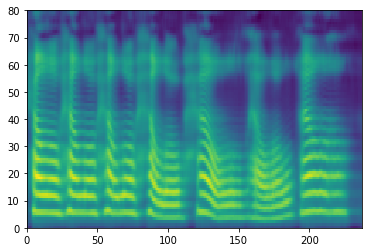

In [ ]:
import numpy as np
from scipy.io.wavfile import write

import matplotlib.pyplot as plt

text = 'hello hello hello hello hello'

# preprocessing
sequence = np.array(tacotron2.text_to_sequence(text, ['english_cleaners']))[None, :]
sequence = torch.from_numpy(sequence).to(device='cuda', dtype=torch.int64)
_, mel, _, _ = tacotron2.infer(sequence)

mel = mel.data.cpu().numpy()[0]

plt.pcolormesh(mel)
print(mel.shape)

# run the models
with torch.no_grad():
    _, mel, _, _ = tacotron2.infer(sequence)
    print(mel)
    print("hello",mel.shape)
    #audio = waveglow.infer(mel)
    mel = torch.from_numpy(flattened_padded_mels[0].reshape((1,80,int(len(flattened_padded_mels[0])/80)))).to(device='cuda')
    audio = waveglow.infer(mel)
audio_numpy = audio[0].data.cpu().numpy()
rate = 22050

from IPython.display import Audio
Audio(audio_numpy, rate=rate)



In [ ]:
#model
import keras
from keras import layers

text = "I am superday happy to"

# preprocessing
sequence = np.array(tacotron2.text_to_sequence(text, ['english_cleaners']))[None, :]
sequence = torch.from_numpy(sequence).to(device='cuda', dtype=torch.int64)
_, mel, _, _ = tacotron2.infer(sequence)

mel = mel.data.cpu().numpy()[0]

print(mel.shape)


# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(mel.shape[0]*mel.shape[1],))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(mel.shape[0]*mel.shape[1], activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')



In [ ]:
hist = autoencoder.fit(mel.flatten()[np.newaxis, :], mel.flatten()[np.newaxis, :],epochs=5)

auto_res = autoencoder.predict(mel.flatten()[np.newaxis, :])
plt.pcolormesh(auto_res)
                